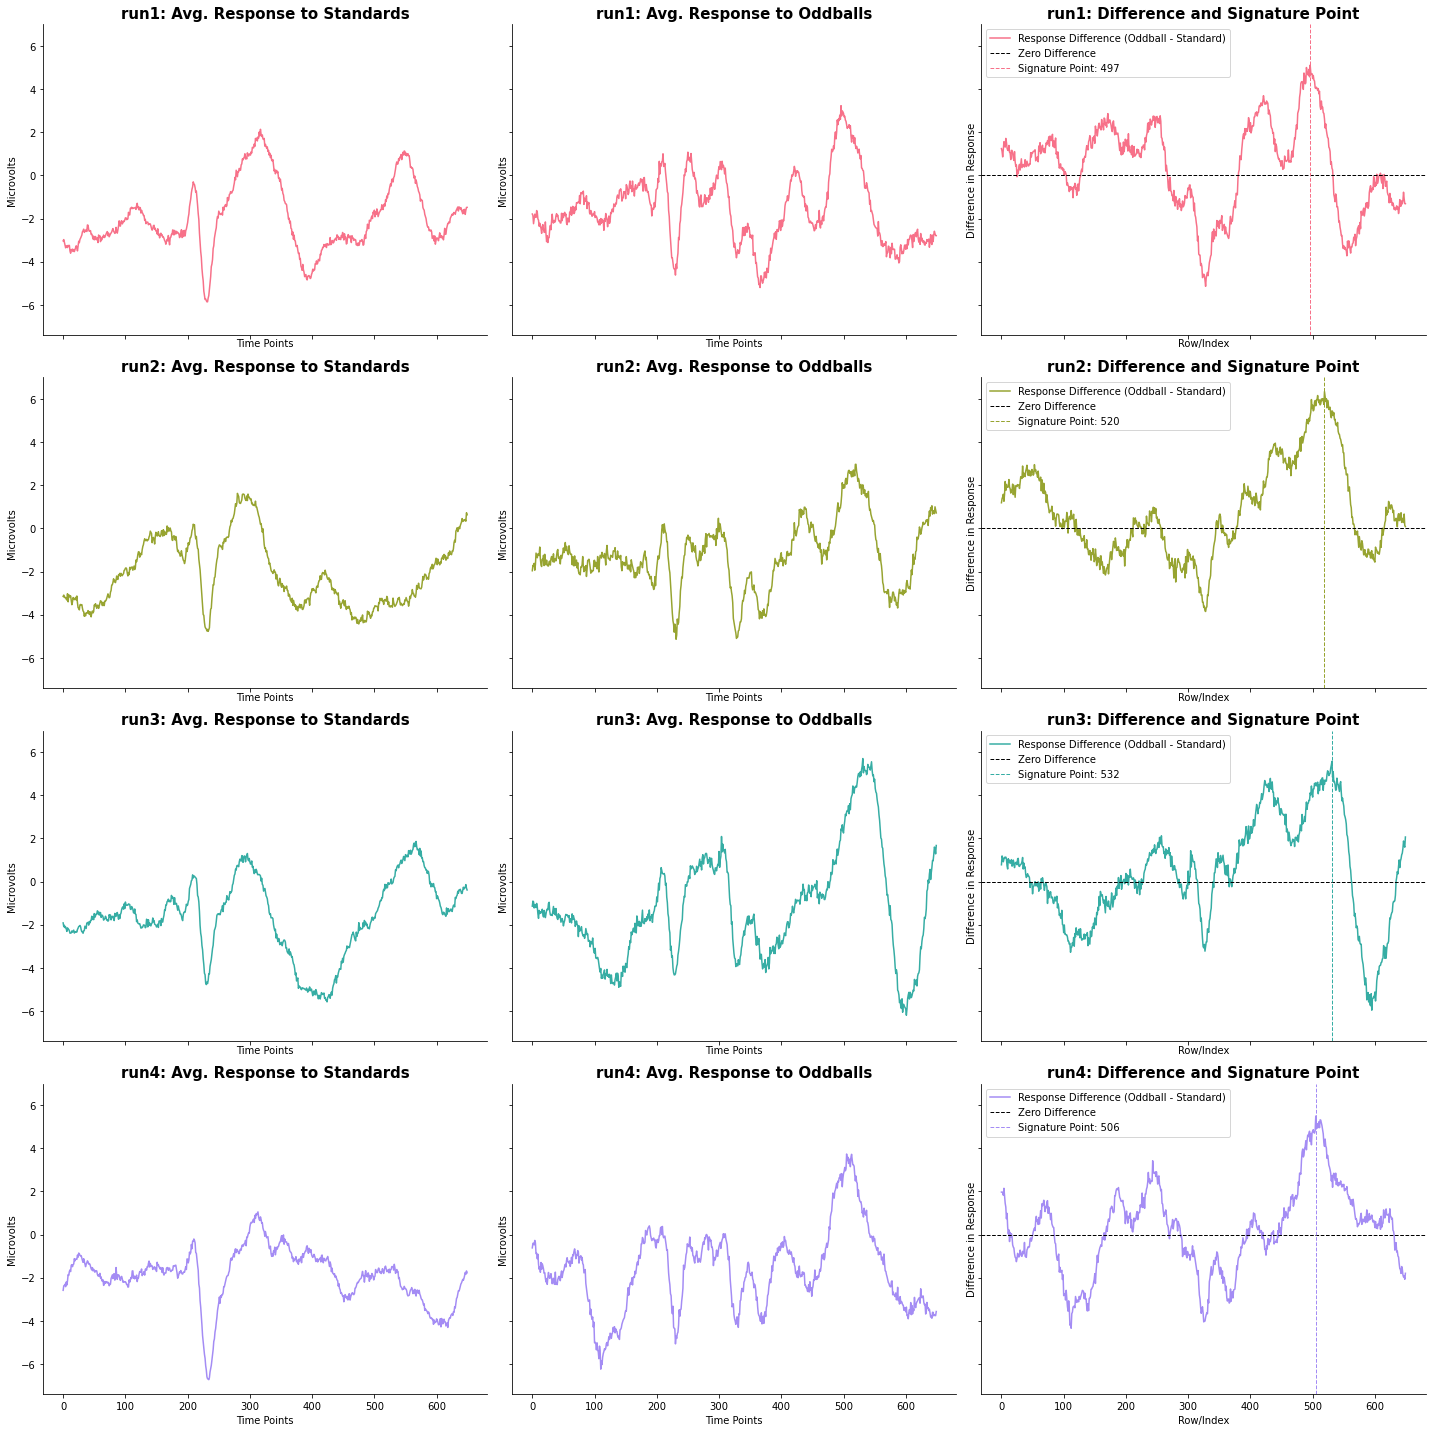

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the data from the provided Excel file
data_file = pd.ExcelFile("Final_question_Oddball_4runs_stimlist.xls")
sheets = ["run1", "run2", "run3", "run4"]

# Initialize an empty dictionary to store data frames
dfs = {}

# Read data frames from Excel sheets
for sheet_name in sheets:
    dfs[sheet_name] = pd.read_excel(data_file, sheet_name)

# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(20, 20), sharex=True, sharey=True)

# Define a color palette for each row
palette = sns.color_palette('husl', n_colors=len(sheets))

# Iterate through each sheet (run)
for i, (sheet_name, color) in enumerate(zip(sheets, palette)):
    df = dfs[sheet_name]

    # Initialize empty lists to store data
    standard_trials = []
    oddball_trials = []

    # Iterate through each trial in current run
    for col in df.columns:
        if 'S' in col:
            tone_type = 'S'
        elif 'O' in col:
            tone_type = 'O'
        else:
            continue

        # Extract EEG segments
        eeg_segments = df.iloc[:, df.columns.get_loc(col)].values

        # Append data to the appropriate list
        if tone_type == 'S':
            standard_trials.append(eeg_segments)
        elif tone_type == 'O':
            oddball_trials.append(eeg_segments)

    # Calculate average response for standard 
    average_response_to_standards = np.mean(standard_trials, axis=0)
    sns.despine(ax=axs[i, 0])
    axs[i, 0].plot(average_response_to_standards, color=color)
    axs[i, 0].set_title(f"{sheet_name}: Avg. Response to Standards", fontweight='bold',fontsize=15)
    axs[i, 0].set_xlabel('Time Points')
    axs[i, 0].set_ylabel('Microvolts')

    # Calculate average response for oddball 
    average_response_to_oddball = np.mean(oddball_trials, axis=0)
    sns.despine(ax=axs[i, 1])
    axs[i, 1].plot(average_response_to_oddball, color=color)
    axs[i, 1].set_title(f"{sheet_name}: Avg. Response to Oddballs", fontweight='bold',fontsize=15)
    axs[i, 1].set_xlabel('Time Points')
    axs[i, 1].set_ylabel('Microvolts')

    # Calculate the difference between oddball and standard stimuli
    response_difference = average_response_to_oddball - average_response_to_standards

    # Identify the time point where the signature occurs
    peak_time_point = np.argmax(response_difference) + 1 

    # Plot the difference
    sns.despine(ax=axs[i, 2])
    axs[i, 2].plot(response_difference, label='Response Difference (Oddball - Standard)', color=color)
    axs[i, 2].axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Difference')
    axs[i, 2].axvline(peak_time_point - 1, color=color, linestyle='--', linewidth=1, label=f'Signature Point: {peak_time_point}')
    axs[i, 2].set_title(f"{sheet_name}: Difference and Signature Point", fontweight='bold',fontsize=15)
    axs[i, 2].set_xlabel('Row/Index')
    axs[i, 2].set_ylabel('Difference in Response')
    axs[i, 2].legend()

# Show the subplots
plt.tight_layout()
plt.show()
